## Let's Import The Required Libraries To Start

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Reading the File to Check the Data

In [2]:
start = pd.read_csv("50_Startups.csv")

In [3]:
start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### It Seems That the Data Is For A Company looking For a Profit Based On Some Expenditure As Below:
- R&D Spend
- Administartion Expenditures
- Marketing Spend

In [4]:
start.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### It Is Clear That The Standard Deviation Of All Factors Are High

### Let's Try To Get Some Relations Between The Given data and Visualize It

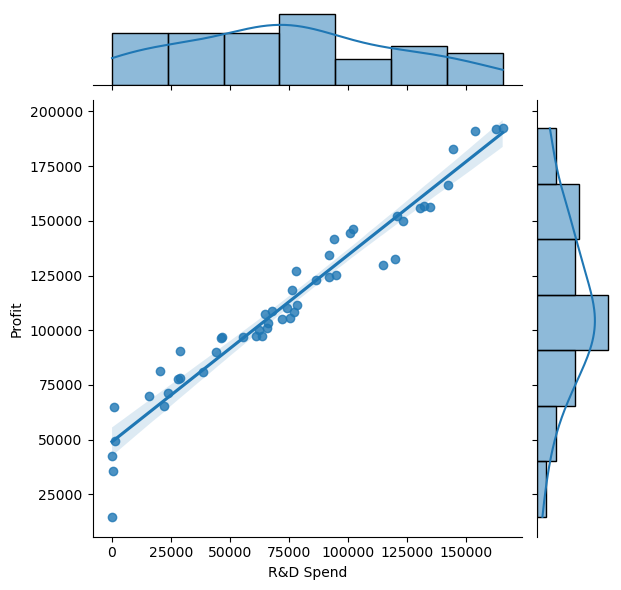

In [6]:
sns.jointplot(x="R&D Spend",y="Profit",kind="reg",data=start)

### As We can See that The Investment In The R&D Researches Is Helping the Companies to Make Profit

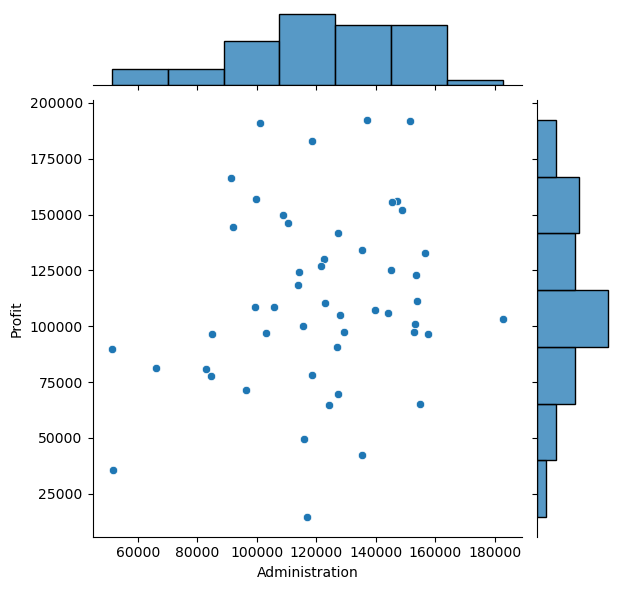

In [7]:
sns.jointplot(x="Administration",y="Profit",data=start)

### Admistartion Expenditure Is not Helping The Companies to Make Profit and Considered As a Non-Values Added Cost

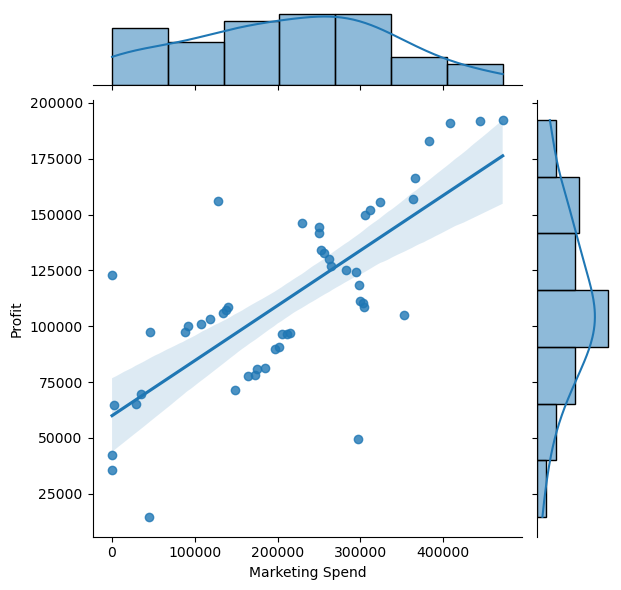

In [8]:
sns.jointplot(x="Marketing Spend",y="Profit",kind="reg",data=start)

### Markting Is Some-How Helping To Make Profit

## Let's Visualize All Data Together

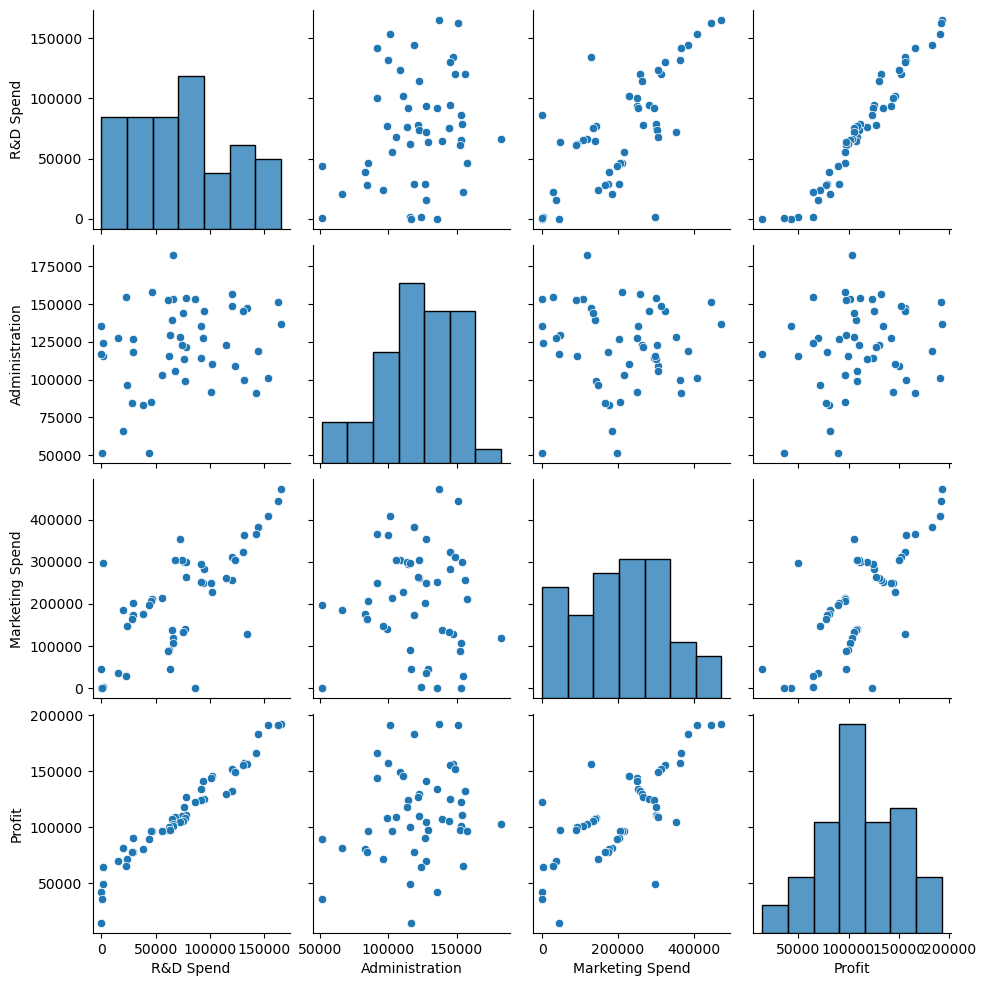

In [9]:
sns.pairplot(start)

<AxesSubplot:>

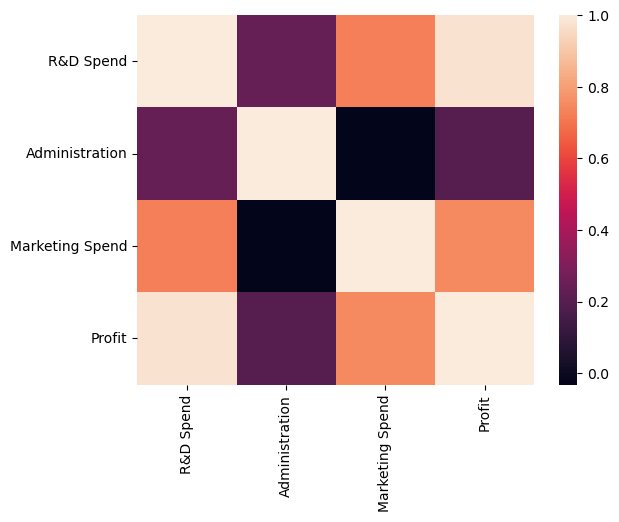

In [10]:
sns.heatmap(start.corr())

### From The Above Two Figures, We Conclude The Below:
- R&D Is a Correlated Data and Having A positive Covariance
- Adminstartion Is A non-Correlated data And Having A Weak Covariance
- Marketing Spend Is A quite Correlated Data and Having A Quite positive Covariance

- The Correlation Is Excellent Between The R&D and Profit, and good Between The Marketing Spend and The profit
The Correlation Is Bad Between the Administartion Expindures And the Profit 

# Training The Model :

### Setting The Data

In [11]:
X = start.iloc[ : , : -2]
y = start.iloc[ : , -1]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size=0.3 , random_state = 20)

### Regression Model

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit( X_train , y_train )

LinearRegression()

### Prediction

In [15]:
pred = model.predict(X_test)

### plotting

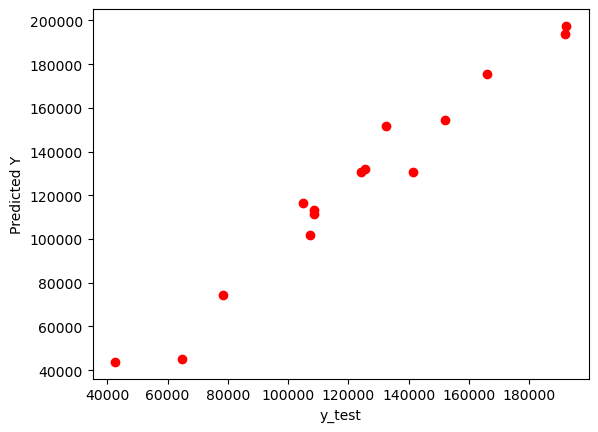

In [16]:

plt.scatter(y_test, pred ,color ="red")
plt.xlabel("y_test")
plt.ylabel("Predicted Y")
plt.show()

### Coefficients

In [17]:
coe_model = pd.DataFrame(model.coef_ , X.columns ,columns=["Coefficient"])
coe_model

,Coefficient
R&D Spend,0.821390
Administration,-0.019721
Marketing Spend,0.038014


#### The Best Choice Is To Focus In Investing In The R&D then The marketing and Reduce The Investment in Administration As much As Possible

### Interception

In [18]:
print(model.intercept_)

46436.0053889221


##### The Project Has A Positive Results and The Dependent is Highly And Positively Depnd On The Independants 

### Calculating MSE, MAE And RMSE

In [19]:
from sklearn import metrics
from math import sqrt

MSE  = metrics.mean_squared_error(y_test , pred)
MAE  = metrics.mean_absolute_error(y_test , pred )
RMSE = sqrt(MSE)

In [20]:
print("MSE : ", MSE)
print("MAE : ", MAE)
print("RMSE : ", RMSE)

MSE :  86608455.01220974
MAE :  7411.74522976727
RMSE :  9306.366369975434


## Conclusion

### Data is not enough to predict the indepent even though the coeffientsare giving a good signs for the success to make profit
### Better to have enough data to increase the prediction accuracy